This project is on the subject of Credit Card Fraud Detection, the dataset is from https://www.kaggle.com/mlg-ulb/creditcardfraud. 

We will do some exploratory data analysis, then we will dive into designing ML Models for the problem. 

As this problem is a classification problem, we will realise that this dataset is a highly imbalanced dataset (because the number of fraudulent transactions are expected to be a small fraction of the total transactions), we will therefore also look at ways of dealing with imbalanced datasets. 

Accuracy is not a good measure of the model's performance (Since the model that predicts all datapoints to be in the Majority Class will also have a good accuracy but is not a good model per se), and so we will also understand about the other metrics that are available and evaluate our model's performances accordingly.  

In [1]:
#Uncomment the below lines and run this cell if you haven't installed imblearn before.
#!pip install -U imbalanced-learn
#!pip install delayed

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the dataset stored in the file <b>creditcard.csv</b> into a pandas dataframe

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can see that the dataset has 28 columns V1 to V28 which is the output of the PCA dimensionality reduction, the Time feature that is the time in seconds when the transaction was initiated (The time is calculated as follows, we take the Time feature for the first row as 0 seconds and the rest of the transactions are calculated in reference to the first transaction), the Amount column that has the money (in dollars) involved in the transaction and the Class column that is the target feature. 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We will now form new features from the Time feature, namely Time_min and Time_hour where we convert the Time in seconds to Minutes and Hours, right now the Time feature is continuous and has a lot of unique values, so converting it to minutes and hours might allow us to glean more information from the data.

In [7]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [8]:
df.drop('Time',axis=1,inplace=True)
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

In [9]:
df.head()

,Time_min,Time_hour,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We will look at the correlation of the different features with the target feature (i.e Class).

In [10]:
df.corr()['Class'].sort_values()[:-1]

V17         -0.326481
V14         -0.302544
V12         -0.260593
V10         -0.216883
V16         -0.196539
V3          -0.192961
V7          -0.187257
V18         -0.111485
V1          -0.101347
V9          -0.097733
V5          -0.094974
V6          -0.043643
Time_hour   -0.017109
V24         -0.007221
V13         -0.004570
V15         -0.004223
V23         -0.002685
Time_min    -0.000124
V22          0.000805
V25          0.003308
V26          0.004455
Amount       0.005632
V28          0.009536
V27          0.017580
V8           0.019875
V20          0.020090
V19          0.034783
V21          0.040413
V2           0.091289
V4           0.133447
V11          0.154876
Name: Class, dtype: float64

We will plot it out so that it is more easier to visualize.

<AxesSubplot:>

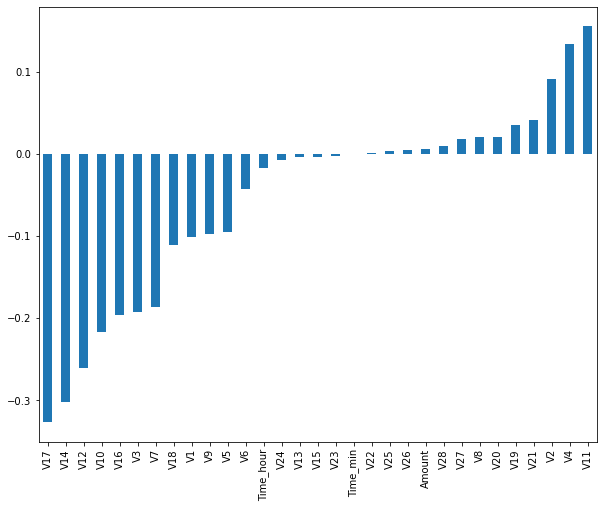

In [11]:
plt.figure(figsize=(10,8))
df.corr()['Class'].sort_values()[:-1].plot.bar()

Now we will look at the Fraud Transactions and plot out a heatmap to see if there are any features that are closely correlated with the target feature.

In [12]:
fraud_df = df.loc[df['Class'] == 1]

<AxesSubplot:>

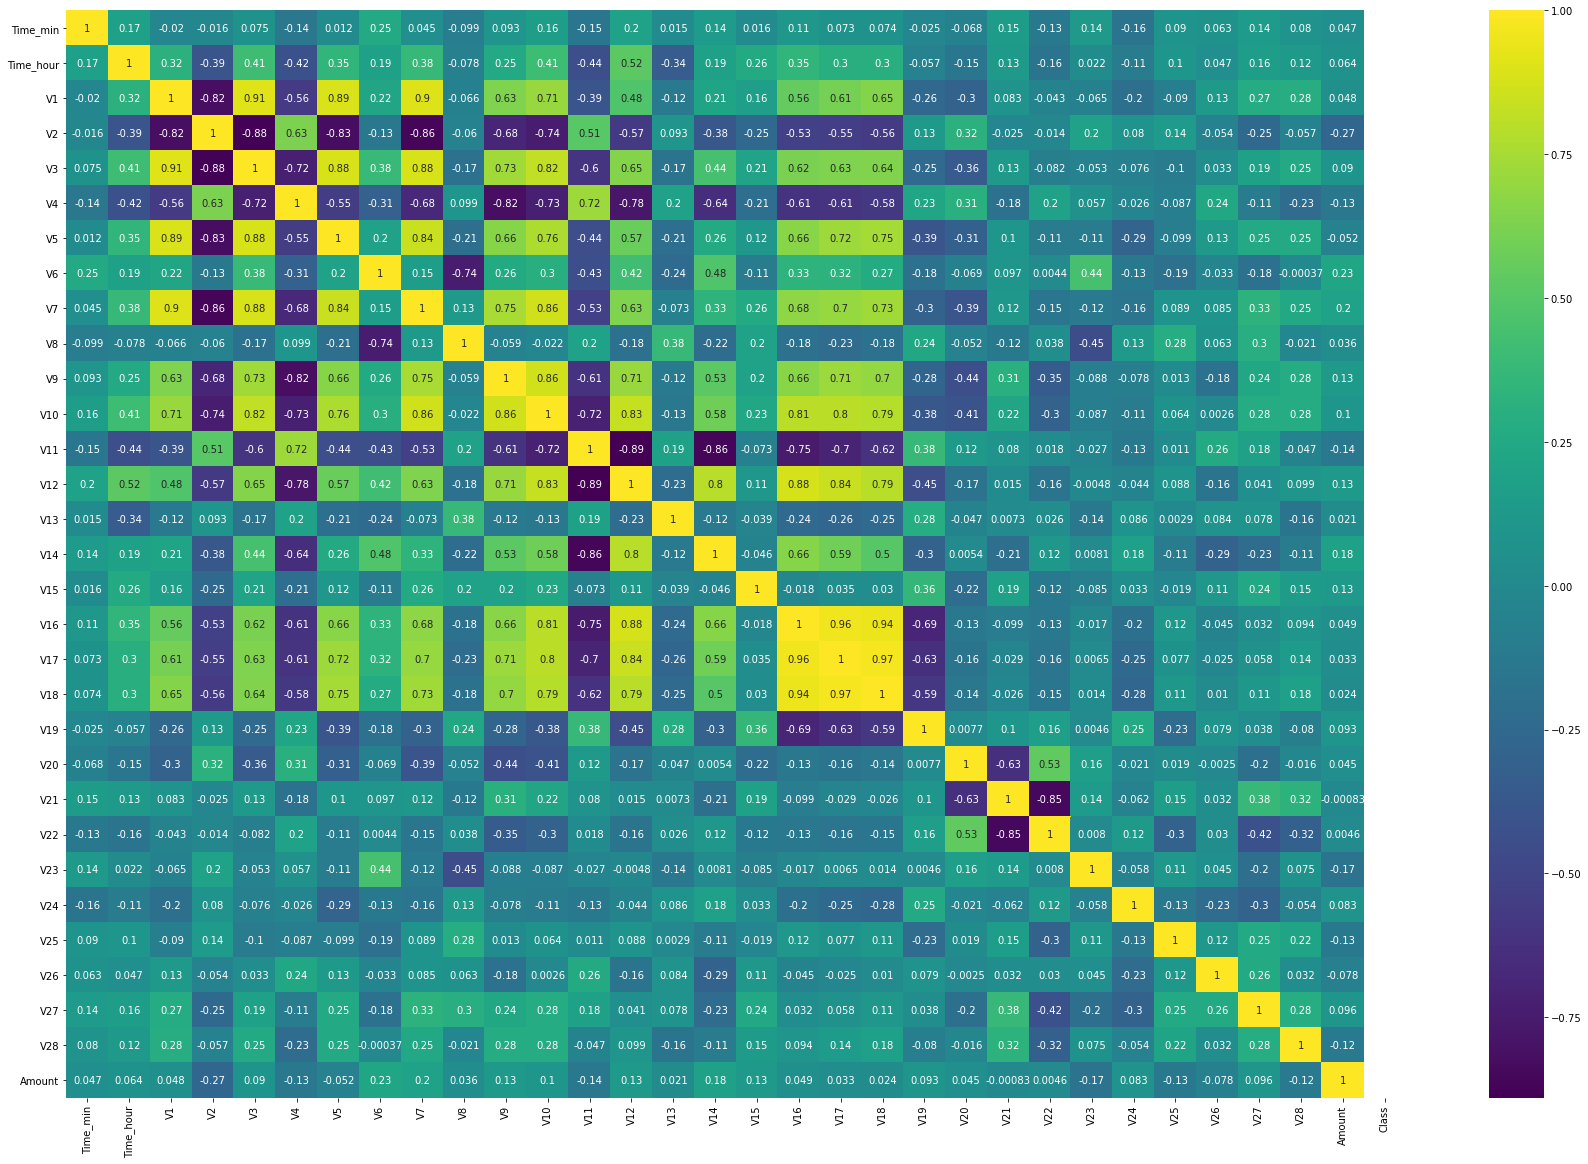

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(fraud_df.corr().drop('Class'),annot=True,cmap='viridis')

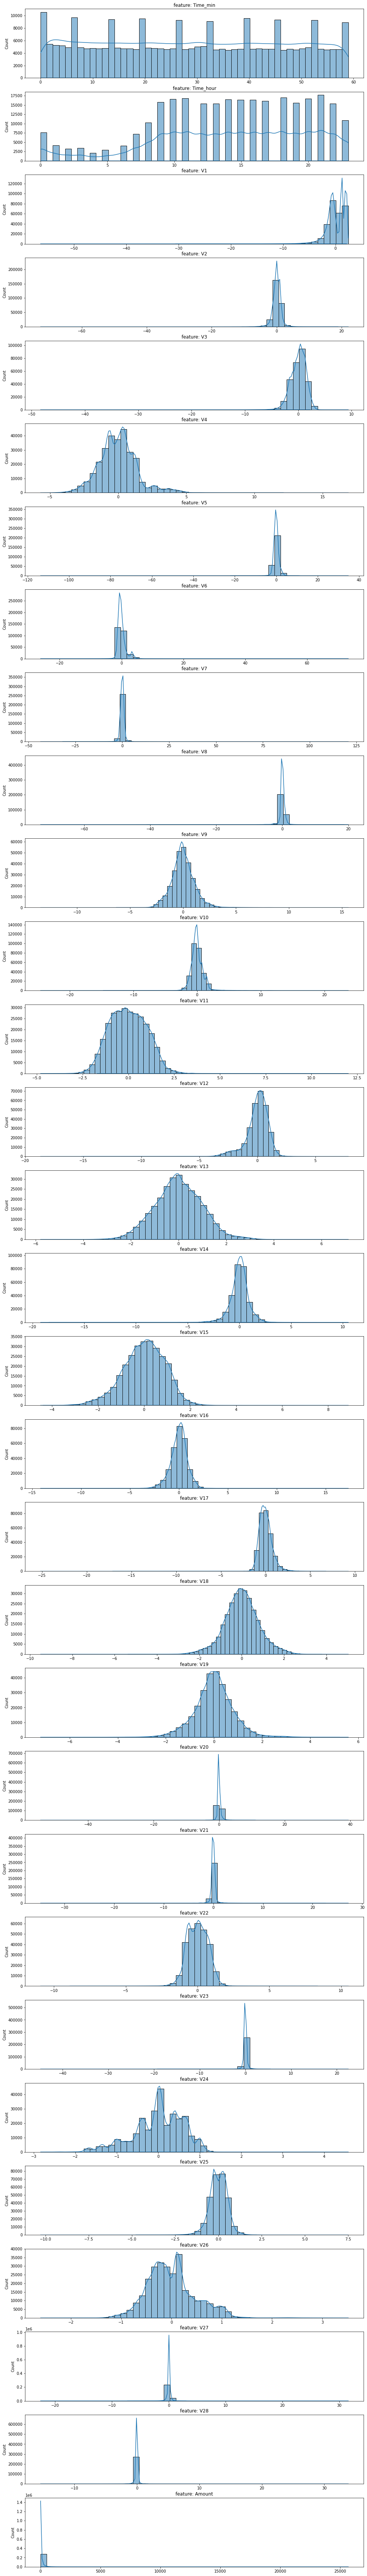

In [14]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(16,31*4))
gs = gridspec.GridSpec(31, 1)
for i, cn in enumerate(df[df.iloc[:, 0:31].columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,kde=True)
    sns.distplot(df[cn][df.Class == 0], bins=50,kde=True)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))

<AxesSubplot:title={'center':'Distribution of Amount Feature'}, xlabel='Amount', ylabel='Count'>

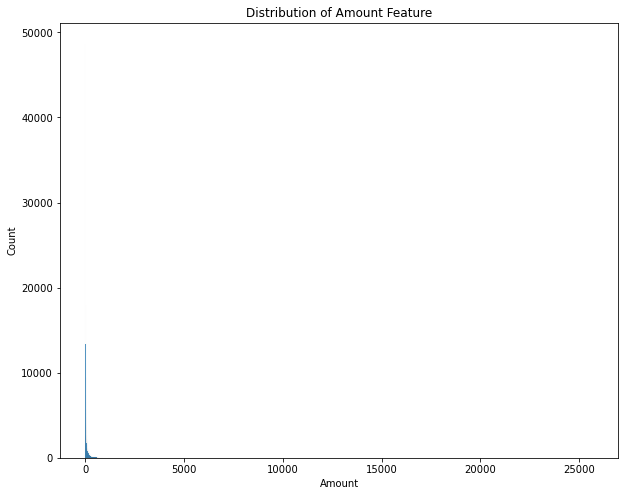

In [15]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount Feature')
sns.distplot(df.Amount)

We can see that most of the Values for the Amount feature is below around 1000 dollars, and the mean is around 88 dollars. 

In [16]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We can see from above that there are 284315 transcations that are Non-fraudulent and 492 transactions that are fraudulent.

Text(0, 0.5, 'Count')

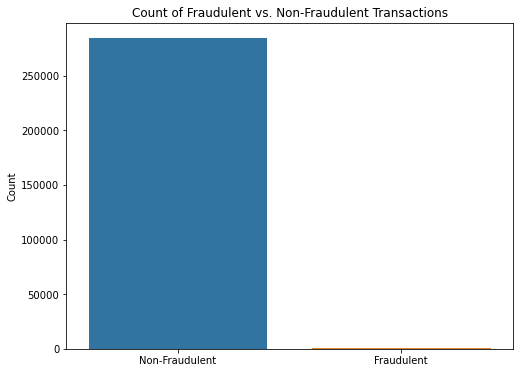

In [17]:
counts = df['Class'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=['Non-Fraudulent','Fraudulent'], y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')

In [18]:
df[df['Amount'] > 1000]

,Time_min,Time_hour,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51,0,0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
89,0,0,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,...,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,0
164,1,0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
633,8,0,-2.752124,-3.232168,0.873036,0.108217,-2.451279,0.486159,3.152907,-1.013087,...,-0.299791,-0.003767,0.545794,0.853981,-0.943651,0.607826,0.335131,-0.561721,1015.61,0
865,10,0,-1.789835,-5.835768,-1.472791,-0.851160,-2.433875,0.401415,1.354543,-0.288283,...,1.081404,-0.178233,-1.635914,-0.645651,0.112930,-0.726724,-0.184806,0.296762,1602.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283875,45,23,0.087032,-2.727628,-3.215031,2.216197,-0.229633,-1.419572,2.553476,-0.987507,...,0.969833,0.738640,-1.082522,0.535977,0.474597,-0.330842,-0.235690,0.105630,1026.46,0
284154,49,23,-1.448606,-2.673922,-3.563343,-0.194096,0.007561,4.999178,4.136303,0.159725,...,0.644819,0.520282,2.202927,0.683422,0.446953,1.403290,-0.242420,0.221515,1088.04,0
284249,51,23,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0
284383,53,23,-0.065120,-4.114668,-2.106854,-0.137339,-1.384530,0.239999,0.893833,-0.257922,...,0.395868,-1.244969,-0.686403,-0.963878,-0.924685,0.210599,-0.253408,0.125687,1114.00,0


We can see that there are only 2940 rows (less than 1% of the Total Dataset) with the Value of Amount as greater than 1000. So, let us ignore those data points and confine ourselves to only those data points with Amount less than 1000.

In [19]:
df = df[df['Amount'] < 1000]

<b>Split the Data into Training and Test Sets</b>

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=101)

<b>Scale the data using MinMaxScaler</b>

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b>We will first create a Logistic Regression Model and look at its performance on the test data</b>

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
lr_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

[[56239     9]
 [   50    50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56248
           1       0.85      0.50      0.63       100

    accuracy                           1.00     56348
   macro avg       0.92      0.75      0.81     56348
weighted avg       1.00      1.00      1.00     56348



We see from the confusion matrix that the model has an recall rate of only 50% on the fraudulent datapoints.

<b>Let us now look at the Random Forest Classifier model</b>

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[56244     4]
 [   30    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56248
           1       0.95      0.70      0.80       100

    accuracy                           1.00     56348
   macro avg       0.97      0.85      0.90     56348
weighted avg       1.00      1.00      1.00     56348



We see that this model has an accuracy of 70% when it comes to correctly answering for the fraudulent transactions.  

We will look at one more model, the Multi Layer Perceptron Classifier to see if we are able to get a better accuracy rate for the fraudulent transactions.

<b>The Multi Layer Perceptron Classifier Model</b>

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=10000,solver='adam')
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000,), max_iter=10000)

In [31]:
mlp_pred = mlp.predict(X_test)

In [32]:
print(confusion_matrix(y_test,mlp_pred))
print(classification_report(y_test,mlp_pred))

[[56237    11]
 [   35    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56248
           1       0.86      0.65      0.74       100

    accuracy                           1.00     56348
   macro avg       0.93      0.82      0.87     56348
weighted avg       1.00      1.00      1.00     56348



This model gives us only a 65% accuracy rate (On the fraudulent transactions). 

In the next section, we will look at one way to handle unbalanced classes. We will make use of the imblearn package and specifically, we will use an undersampling technique called the ClusterCentroids. An Undersampling technique like the name suggests, samples only a fraction of the bigger classes so that we have a (almost) balanced dataset. In particular, ClusterCentroids clusters the datapoints and keeps only the cluster centers as the datapoint, thus bringing down the imbalance. 

### Using ClusterCentroids from the imblearn Package

Import imblearn and ClusterCentroids

In [33]:
import imblearn
from imblearn.under_sampling import ClusterCentroids

Create a new dataset that has a ratio of Non-fraudulent to Fraudulent transactions as 2 to 1

In [34]:
cc = ClusterCentroids(sampling_strategy=1/2)

X_cc, y_cc = cc.fit_resample(X_train, y_train)

X_train, X_validation, y_train, y_validation = train_test_split(X_cc , y_cc , test_size=0.25, random_state=101)

unique, counts = np.unique(y_cc, return_counts=True)
dict(zip(unique, counts)) 

{0: 766, 1: 383}

Scale the Data

In [35]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

<b>We will first Design a Logistic Regression Model</b>

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
lr_pred = lr.predict(X_validation)
print("Validation Data")
print(confusion_matrix(y_validation,lr_pred))
print(classification_report(y_validation,lr_pred))

Validation Data
[[200   1]
 [ 12  75]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       201
           1       0.99      0.86      0.92        87

    accuracy                           0.95       288
   macro avg       0.97      0.93      0.94       288
weighted avg       0.96      0.95      0.95       288



The Logistic Regression Model has a recall of 93% on the Validation dataset.

In [38]:
lr_pred = lr.predict(X_test)
print("Test Data")
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

Test Data
[[56178    70]
 [   23    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56248
           1       0.52      0.77      0.62       100

    accuracy                           1.00     56348
   macro avg       0.76      0.88      0.81     56348
weighted avg       1.00      1.00      1.00     56348



The Logistic Regression Model has a recall of 88% on the Test dataset.

<b>Let us now look at the Random Forest Classifier model</b>

In [39]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [40]:
rfc_pred = rfc.predict(X_validation)
print("Validation Data")
print(confusion_matrix(y_validation,rfc_pred))
print(classification_report(y_validation,rfc_pred))

Validation Data
[[201   0]
 [  2  85]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       201
           1       1.00      0.98      0.99        87

    accuracy                           0.99       288
   macro avg       1.00      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



The Random Forest Classifier Model has a recall of 99% on the Validation dataset.

In [41]:
rfc_pred = rfc.predict(X_test)
print("Test Data")
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Test Data
[[37327 18921]
 [    5    95]]
              precision    recall  f1-score   support

           0       1.00      0.66      0.80     56248
           1       0.00      0.95      0.01       100

    accuracy                           0.66     56348
   macro avg       0.50      0.81      0.40     56348
weighted avg       1.00      0.66      0.80     56348



The Random Forest Classifier Model has a recall of 81% on the Test dataset, there is a big difference between the model's performance on validation and test dataset which implies that the model may be overfitting. So let us design a new model with n_estimators = 100 and look at its performance.

In [42]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
rfc_pred = rfc.predict(X_validation)
print("Validation Data")
print(confusion_matrix(y_validation,rfc_pred))
print(classification_report(y_validation,rfc_pred))

Validation Data
[[200   1]
 [  2  85]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       201
           1       0.99      0.98      0.98        87

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



This Model also has a recall of 99% on the Validation dataset.

In [44]:
rfc_pred = rfc.predict(X_test)
print("Test Data")
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Test Data
[[35666 20582]
 [    6    94]]
              precision    recall  f1-score   support

           0       1.00      0.63      0.78     56248
           1       0.00      0.94      0.01       100

    accuracy                           0.63     56348
   macro avg       0.50      0.79      0.39     56348
weighted avg       1.00      0.63      0.77     56348



This has a slightly poorer performance, so seems like Random Forests may not be a good fit for this dataset.

<b>Let us now look at the Multi-Layer Perceptron Classifier model</b>

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(2000,), max_iter=25000,solver='adam')
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(2000,), max_iter=25000)

In [49]:
mlp_pred = mlp.predict(X_validation)
print("Validation Data")
print(confusion_matrix(y_validation,mlp_pred))
print(classification_report(y_validation,mlp_pred))

Validation Data
[[198   3]
 [  7  80]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       201
           1       0.96      0.92      0.94        87

    accuracy                           0.97       288
   macro avg       0.96      0.95      0.96       288
weighted avg       0.97      0.97      0.97       288



The MLP Model has a recall of 95% on the Validation dataset.

In [50]:
mlp_pred = mlp.predict(X_test)
print("Test Data")
print(confusion_matrix(y_test,mlp_pred))
print(classification_report(y_test,mlp_pred))

Test Data
[[55515   733]
 [   19    81]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56248
           1       0.10      0.81      0.18       100

    accuracy                           0.99     56348
   macro avg       0.55      0.90      0.59     56348
weighted avg       1.00      0.99      0.99     56348



The MLP Model has a recall of 90% on the Test dataset, which is close to the performance on the Validation dataset and thus we can expect this model to have this recall rate on any new dataset.

<b>We will now design a Keras Neural Network Model</b>

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
model = Sequential()

model.add(Dense(32,  activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=512,
          validation_data=(X_validation, y_validation), 
          callbacks=[early_stop]
          )

Epoch 1/500
2/2 [==============================] - 1s 157ms/step - loss: 0.7885 - val_loss: 0.7222
Epoch 2/500
2/2 [==============================] - 0s 35ms/step - loss: 0.7633 - val_loss: 0.7128
Epoch 3/500
2/2 [==============================] - 0s 30ms/step - loss: 0.7452 - val_loss: 0.7031
Epoch 4/500
2/2 [==============================] - 0s 42ms/step - loss: 0.7416 - val_loss: 0.6946
Epoch 5/500
2/2 [==============================] - 0s 31ms/step - loss: 0.7297 - val_loss: 0.6851
Epoch 6/500
2/2 [==============================] - 0s 30ms/step - loss: 0.7108 - val_loss: 0.6726
Epoch 7/500
2/2 [==============================] - 0s 31ms/step - loss: 0.7076 - val_loss: 0.6599
Epoch 8/500
2/2 [==============================] - 0s 30ms/step - loss: 0.7117 - val_loss: 0.6488
Epoch 9/500
2/2 [==============================] - 0s 29ms/step - loss: 0.6834 - val_loss: 0.6410
Epoch 10/500
2/2 [==============================] - 0s 30ms/step - loss: 0.6861 - val_loss: 0.6361
Epoch 11/500
2/2 [

Epoch 84/500
2/2 [==============================] - 0s 30ms/step - loss: 0.3544 - val_loss: 0.2339
Epoch 85/500
2/2 [==============================] - 0s 30ms/step - loss: 0.3623 - val_loss: 0.2300
Epoch 86/500
2/2 [==============================] - 0s 29ms/step - loss: 0.3536 - val_loss: 0.2265
Epoch 87/500
2/2 [==============================] - 0s 30ms/step - loss: 0.3457 - val_loss: 0.2211
Epoch 88/500
2/2 [==============================] - 0s 32ms/step - loss: 0.3717 - val_loss: 0.2163
Epoch 89/500
2/2 [==============================] - 0s 30ms/step - loss: 0.3481 - val_loss: 0.2120
Epoch 90/500
2/2 [==============================] - 0s 30ms/step - loss: 0.3647 - val_loss: 0.2082
Epoch 91/500
2/2 [==============================] - 0s 29ms/step - loss: 0.3315 - val_loss: 0.2050
Epoch 92/500
2/2 [==============================] - 0s 32ms/step - loss: 0.3444 - val_loss: 0.2033
Epoch 93/500
2/2 [==============================] - 0s 30ms/step - loss: 0.3144 - val_loss: 0.2014
Epoch 94/5

2/2 [==============================] - 0s 31ms/step - loss: 0.2260 - val_loss: 0.1249
Epoch 167/500
2/2 [==============================] - 0s 35ms/step - loss: 0.2329 - val_loss: 0.1243
Epoch 168/500
2/2 [==============================] - 0s 32ms/step - loss: 0.2388 - val_loss: 0.1243
Epoch 169/500
2/2 [==============================] - 0s 30ms/step - loss: 0.2359 - val_loss: 0.1232
Epoch 170/500
2/2 [==============================] - 0s 29ms/step - loss: 0.2679 - val_loss: 0.1227
Epoch 171/500
2/2 [==============================] - 0s 30ms/step - loss: 0.2535 - val_loss: 0.1245
Epoch 172/500
2/2 [==============================] - 0s 30ms/step - loss: 0.2488 - val_loss: 0.1277
Epoch 173/500
2/2 [==============================] - 0s 30ms/step - loss: 0.2106 - val_loss: 0.1257
Epoch 174/500
2/2 [==============================] - 0s 29ms/step - loss: 0.2261 - val_loss: 0.1256
Epoch 175/500
2/2 [==============================] - 0s 31ms/step - loss: 0.2333 - val_loss: 0.1283
Epoch 176/500


2/2 [==============================] - 0s 30ms/step - loss: 0.2175 - val_loss: 0.1157
Epoch 249/500
2/2 [==============================] - 0s 29ms/step - loss: 0.2190 - val_loss: 0.1160
Epoch 250/500
2/2 [==============================] - 0s 28ms/step - loss: 0.2457 - val_loss: 0.1137
Epoch 251/500
2/2 [==============================] - 0s 30ms/step - loss: 0.1928 - val_loss: 0.1118
Epoch 252/500
2/2 [==============================] - 0s 37ms/step - loss: 0.1812 - val_loss: 0.1117
Epoch 253/500
2/2 [==============================] - 0s 33ms/step - loss: 0.2045 - val_loss: 0.1131
Epoch 254/500
2/2 [==============================] - 0s 30ms/step - loss: 0.1829 - val_loss: 0.1157
Epoch 255/500
2/2 [==============================] - 0s 29ms/step - loss: 0.1880 - val_loss: 0.1159
Epoch 256/500
2/2 [==============================] - 0s 30ms/step - loss: 0.2252 - val_loss: 0.1129
Epoch 257/500
2/2 [==============================] - 0s 30ms/step - loss: 0.2128 - val_loss: 0.1123
Epoch 258/500


<AxesSubplot:>

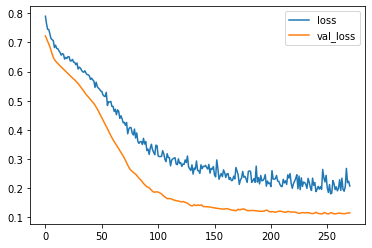

In [58]:
model_losses = pd.DataFrame(model.history.history)
model_losses[['loss','val_loss']].plot()

In [59]:
y_proba = model.predict(X_validation)

predictions = np.zeros(len(y_proba))
for i in range(len(y_proba)):
    if y_proba[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
        
print(confusion_matrix(y_validation,predictions))
print('\n')
print(classification_report(y_validation,predictions))

[[197   4]
 [  6  81]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       201
           1       0.95      0.93      0.94        87

    accuracy                           0.97       288
   macro avg       0.96      0.96      0.96       288
weighted avg       0.97      0.97      0.97       288



The Keras Model has a recall of 96% on the Validation dataset.

In [60]:
y_proba = model.predict(X_test)

predictions = np.zeros(len(y_proba))
for i in range(len(y_proba)):
    if y_proba[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[54899  1349]
 [   14    86]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56248
           1       0.06      0.86      0.11       100

    accuracy                           0.98     56348
   macro avg       0.53      0.92      0.55     56348
weighted avg       1.00      0.98      0.99     56348



The Keras Model has a recall of 92% on the Test dataset.

In [61]:
print("Multi-Layer Perceptron Model\n")
print(confusion_matrix(y_test,mlp_pred))
print('\n')
print(classification_report(y_test,mlp_pred))
print('\n')
print("Keras ANN Model \n")
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

Multi-Layer Perceptron Model

[[55515   733]
 [   19    81]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56248
           1       0.10      0.81      0.18       100

    accuracy                           0.99     56348
   macro avg       0.55      0.90      0.59     56348
weighted avg       1.00      0.99      0.99     56348



Keras ANN Model 

[[54899  1349]
 [   14    86]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56248
           1       0.06      0.86      0.11       100

    accuracy                           0.98     56348
   macro avg       0.53      0.92      0.55     56348
weighted avg       1.00      0.98      0.99     56348



The Keras ANN Model has a better recall rate than the the Multi-Layer Perceptron Model on both Validation and Test datasets, but looking at the confusion matrix, we can see that the Multi-Layer Perceptron Model has a lesser error rate on classifying the Non-Fraudulent Transactions (i.e it misclassifies 733 non-fraudulent transactions compared to 1349 for the Keras Model) whereas the Keras Model is better in classifying the Fraudulent Transactions (error rate of 14% in comparison to 19% for the MLP Model).

## Oversampling using SMOTE

Another way to deal with imbalanced datasets is to create more samples of the lesser class (called oversampling) and SMOTE is one of the most commonly used oversampling algorithm. We will use SMOTE and see if we can get a better performing model.

Firstly we import SMOTE from imblearn.over_sampling

In [62]:
from imblearn.over_sampling import SMOTE

Create the dependent and target features.

In [63]:
X = df.drop('Class', axis=1)
y = df['Class']

Split the dataset into a training set and a test set.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=101)

Use SMOTE to resample the training dataset, then split the training dataset into a training set and a validation dataset using train_test_split.

In [65]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

X_train, X_validation, y_train, y_validation = train_test_split(X_sm , y_sm , test_size=0.25, random_state=101)

unique, counts = np.unique(y_sm, return_counts=True)
dict(zip(unique, counts))

{0: 225007, 1: 225007}

We can see that we now have the same number of samples for both the classes after applying SMOTE.

We then scale our data.

In [66]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

From the previous section, we saw that Multi-Layer Perceptron and the Keras ANN Model seemed to give good performance, so we will use the same algorithms, starting with Multi-Layer Perceptron.

### Multi-Layer Perceptron

Design the model and fit the training dataset.

In [67]:
mlp = MLPClassifier(hidden_layer_sizes=(250,), max_iter=1000,solver='adam')
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(250,), max_iter=1000)

Calculate its performance on the validation dataset.

In [68]:
mlp_pred = mlp.predict(X_validation)
print("Validation Data")
print(confusion_matrix(y_validation,mlp_pred))
print(classification_report(y_validation,mlp_pred))

Validation Data
[[56060    80]
 [   43 56321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56140
           1       1.00      1.00      1.00     56364

    accuracy                           1.00    112504
   macro avg       1.00      1.00      1.00    112504
weighted avg       1.00      1.00      1.00    112504



The MLP Classifier Model has a recall of 100% on the Validation dataset.

Calculate its performance on the test dataset.

In [69]:
mlp_pred = mlp.predict(X_test)
print("Test Data")
print(confusion_matrix(y_test,mlp_pred))
print(classification_report(y_test,mlp_pred))

Test Data
[[56162    86]
 [   19    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56248
           1       0.49      0.81      0.61       100

    accuracy                           1.00     56348
   macro avg       0.74      0.90      0.80     56348
weighted avg       1.00      1.00      1.00     56348



The MLP Classifier Model has a recall of 90% on the Test dataset.

In [71]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500,solver='adam')
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=500)

In [72]:
mlp_pred = mlp.predict(X_validation)
print("Validation Data")
print(confusion_matrix(y_validation,mlp_pred))
print(classification_report(y_validation,mlp_pred))

Validation Data
[[55979   161]
 [   18 56346]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56140
           1       1.00      1.00      1.00     56364

    accuracy                           1.00    112504
   macro avg       1.00      1.00      1.00    112504
weighted avg       1.00      1.00      1.00    112504



In [73]:
mlp_pred = mlp.predict(X_test)
print("Test Data")
print(confusion_matrix(y_test,mlp_pred))
print(classification_report(y_test,mlp_pred))

Test Data
[[56058   190]
 [   18    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56248
           1       0.30      0.82      0.44       100

    accuracy                           1.00     56348
   macro avg       0.65      0.91      0.72     56348
weighted avg       1.00      1.00      1.00     56348



This Model performs slightly better with a recall rate of 91%. We will now see if we can get a better performance with a Keras ANN Model. 

### Keras ANN Model

Design the model and fit the training dataset.

In [74]:
model = Sequential()

model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=512,
          validation_data=(X_validation, y_validation), 
          callbacks=[early_stop]
          )

Epoch 1/500
660/660 [==============================] - 5s 7ms/step - loss: 0.4826 - val_loss: 0.0894
Epoch 2/500
660/660 [==============================] - 4s 6ms/step - loss: 0.2087 - val_loss: 0.0727
Epoch 3/500
660/660 [==============================] - 4s 6ms/step - loss: 0.1806 - val_loss: 0.0663
Epoch 4/500
660/660 [==============================] - 4s 6ms/step - loss: 0.1676 - val_loss: 0.0646
Epoch 5/500
660/660 [==============================] - 4s 6ms/step - loss: 0.1612 - val_loss: 0.0604
Epoch 6/500
660/660 [==============================] - 4s 6ms/step - loss: 0.1596 - val_loss: 0.0740
Epoch 7/500
660/660 [==============================] - 4s 6ms/step - loss: 0.1535 - val_loss: 0.0550
Epoch 8/500
660/660 [==============================] - 4s 6ms/step - loss: 0.1511 - val_loss: 0.0546
Epoch 9/500
660/660 [==============================] - 4s 6ms/step - loss: 0.1559 - val_loss: 0.0550
Epoch 10/500
660/660 [==============================] - 4s 6ms/step - loss: 0.1510 - val_lo

We will plot the training loss and validation loss

<AxesSubplot:>

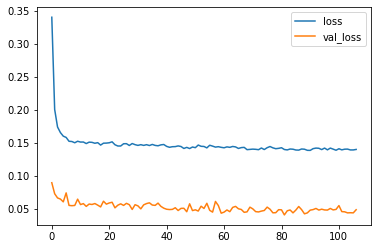

In [75]:
model_losses = pd.DataFrame(model.history.history)
model_losses[['loss','val_loss']].plot()

Calculate its performance on the validation dataset.

In [76]:
y_proba = model.predict(X_validation)

predictions = np.zeros(len(y_proba))
for i in range(len(y_proba)):
    if y_proba[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
        
print(confusion_matrix(y_validation,predictions))
print('\n')
print(classification_report(y_validation,predictions))

[[55388   752]
 [ 1024 55340]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     56140
           1       0.99      0.98      0.98     56364

    accuracy                           0.98    112504
   macro avg       0.98      0.98      0.98    112504
weighted avg       0.98      0.98      0.98    112504



The Keras Model has a recall of 98% on the Validation dataset

Calculate its performance on the test dataset.

In [77]:
y_proba = model.predict(X_test)

predictions = np.zeros(len(y_proba))
for i in range(len(y_proba)):
    if y_proba[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[55471   777]
 [   17    83]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56248
           1       0.10      0.83      0.17       100

    accuracy                           0.99     56348
   macro avg       0.55      0.91      0.58     56348
weighted avg       1.00      0.99      0.99     56348



This Keras Model also has a recall of 91% on the Test dataset

In [86]:
model = Sequential()

model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=2048,
          validation_data=(X_validation, y_validation), 
          callbacks=[early_stop]
          )

Epoch 1/500
165/165 [==============================] - 3s 15ms/step - loss: 0.6916 - val_loss: 0.3703
Epoch 2/500
165/165 [==============================] - 2s 14ms/step - loss: 0.4009 - val_loss: 0.1761
Epoch 3/500
165/165 [==============================] - 2s 14ms/step - loss: 0.2965 - val_loss: 0.1279
Epoch 4/500
165/165 [==============================] - 2s 14ms/step - loss: 0.2619 - val_loss: 0.1322
Epoch 5/500
165/165 [==============================] - 2s 14ms/step - loss: 0.2385 - val_loss: 0.0967
Epoch 6/500
165/165 [==============================] - 2s 15ms/step - loss: 0.2225 - val_loss: 0.0884
Epoch 7/500
165/165 [==============================] - 2s 15ms/step - loss: 0.2081 - val_loss: 0.0846
Epoch 8/500
165/165 [==============================] - 2s 15ms/step - loss: 0.1973 - val_loss: 0.0745
Epoch 9/500
165/165 [==============================] - 2s 14ms/step - loss: 0.1898 - val_loss: 0.0667
Epoch 10/500
165/165 [==============================] - 2s 14ms/step - loss: 0.177

<AxesSubplot:>

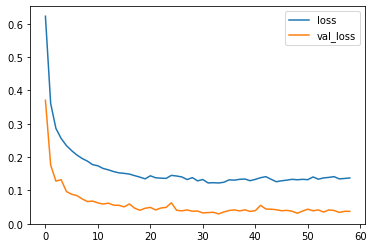

In [87]:
model_losses = pd.DataFrame(model.history.history)
model_losses[['loss','val_loss']].plot()

In [88]:
y_proba = model.predict(X_validation)

predictions = np.zeros(len(y_proba))
for i in range(len(y_proba)):
    if y_proba[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
        
print(confusion_matrix(y_validation,predictions))
print('\n')
print(classification_report(y_validation,predictions))

[[55472   668]
 [  970 55394]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56140
           1       0.99      0.98      0.99     56364

    accuracy                           0.99    112504
   macro avg       0.99      0.99      0.99    112504
weighted avg       0.99      0.99      0.99    112504



This Keras Model has a recall of 99% on the Validation dataset

In [89]:
y_proba = model.predict(X_test)

predictions = np.zeros(len(y_proba))
for i in range(len(y_proba)):
    if y_proba[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[55536   712]
 [   15    85]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56248
           1       0.11      0.85      0.19       100

    accuracy                           0.99     56348
   macro avg       0.55      0.92      0.59     56348
weighted avg       1.00      0.99      0.99     56348



This Keras Model has a recall of 92% on the Test dataset, which is the same as the Keras ANN Model we had designed while using the undersampling technique.

#### Does our Model handle outliers well?

Remember that we removed the datapoints that had an Amount of over 1000 as outliers. We will now look at how well our model is able to handle these outliers. First read the dataset into a pandas dataframe.

In [90]:
df1 = pd.read_csv("creditcard.csv")

Take only the rows that have an Amount value of more than 1000, and split it into the dependent features and the target feature

In [91]:
df1 = df1[df1['Amount'] > 1000]

X_t = df1.drop('Class',axis=1).values
y_t = df1['Class'].values

Use our scaler object to scale the data.

In [93]:
X_t = scaler.transform(X_t)

Run the Model and output its performance metrics.

In [94]:
y_proba = model.predict(X_t)

predictions = np.zeros(len(y_proba))
for i in range(len(y_proba)):
    if y_proba[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(confusion_matrix(y_t,predictions))
print('\n')
print(classification_report(y_t,predictions))

[[2791  140]
 [   2    7]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2931
           1       0.05      0.78      0.09         9

    accuracy                           0.95      2940
   macro avg       0.52      0.87      0.53      2940
weighted avg       1.00      0.95      0.97      2940



We see that the Model has a 95% accuracy on the Non-Fraudulent Transactions (which is okay), and the number of Fraudulent Transactions is very few to be able to say if the model does a good job on the fraudulent outliers.